In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv('cleaned_training_data.csv')
X = df.drop(columns=['Unnamed: 0', 'y'])
y = df['y']

In [67]:
test_df = pd.read_csv('test.csv')

In [11]:
np.unique(df['y'])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  53.,  54.,  55.,  57.,
        58.,  59.,  60.,  61.,  62.,  64.,  65.,  68.,  69.,  70.,  71.,
        72.,  74.,  77.,  78.,  79.,  81.,  83.,  84.,  89.,  90.,  92.,
        94.,  95.,  99., 100.])

(array([4163.,  765.,  223.,   89.,   50.,   23.,   19.,   10.,    8.,
          30.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

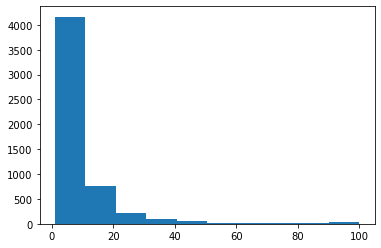

In [12]:
plt.hist(df['y'])

In [113]:
explained_ratio = 0
pca = PCA(n_components=1)
i = 1
while explained_ratio < 0.95:
    pca = PCA(n_components=i)
    pca.fit(scaled_X)
#     print(pca.explained_variance_ratio_)
    i += 1
    explained_ratio = sum(pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)

Number of components: 130


In [112]:
pca = PCA(1)
pca.fit(scaled_X)
np.sum(pca.explained_variance_ratio_)

0.17663706489866193

In [9]:
pca = PCA(130)
pca_95X = pca.fit_transform(scaled_X)
pca_95X

array([[ 1.07991034e+01, -1.05217131e+01, -1.45396053e+00, ...,
         1.17830304e+00,  1.03255979e+00, -1.15035795e-01],
       [-1.37444268e+01,  6.43230529e-01,  1.62988747e+00, ...,
         5.77159982e-01,  2.94036532e-01,  5.53446719e-01],
       [ 3.42547604e+00, -9.30948600e+00,  1.77974900e+00, ...,
        -9.21034803e-01, -6.64232775e-01, -2.10036040e-01],
       ...,
       [-3.55740548e-01, -8.60518515e+00,  6.30252976e+00, ...,
        -1.28976165e-02,  5.82412897e-01, -4.19432730e-01],
       [ 1.38698787e+01, -2.30567701e+00, -1.58848450e+00, ...,
        -6.04192141e-01,  2.81648564e-01, -7.77947464e-01],
       [-5.93989044e+00, -9.09080524e+00, -6.40504777e+00, ...,
        -1.76550449e-01, -6.57922402e-01, -2.57060652e+00]])

In [120]:
test_df

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,6.507826e+10,7882.15,6.82,0.00210,1.712586e+09,0.39,583617.74,862986.0,63872.0,1.470000e+14,...,0.0380,0.0010,9.020487e+10,0.26,8.0,5.0,5.0,30.1213,27.95,-0.49000
1,3.122741e+09,4682.13,8.17,0.00010,1.040914e+09,0.00,190000.65,688710.0,35407.0,1.130000e+13,...,0.1866,0.0192,3.744957e+10,0.02,16.0,1.0,8.0,2.1282,10.18,0.55000
2,3.888719e+10,7495.57,7.15,0.00285,2.160400e+09,0.42,351570.67,841523.0,170240.0,4.140000e+13,...,0.0100,0.0017,1.084794e+10,0.83,35.0,1.0,19.0,7.8513,21.27,19.09000
3,7.727427e+10,4003.76,6.53,0.00165,5.519591e+09,0.00,320216.05,466131.0,35.0,2.080000e+13,...,0.4636,0.0000,3.720010e+07,0.51,1.0,4.0,0.0,9.0511,18.38,4.11000
4,4.184868e+09,34874.72,6.39,0.00065,1.046217e+09,0.50,3349978.53,3711028.0,1757.0,2.110000e+16,...,2.8737,0.0001,1.640000e+13,0.12,2.0,1.0,2.0,2.6512,149.68,0.02000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,3.217682e+09,2214.42,5.27,0.00010,1.608841e+09,0.00,520766.78,172141.0,1307.0,3.870000e+13,...,0.0771,0.0095,3.144693e+10,0.74,0.0,0.0,0.0,1.6431,22.42,1.11315
4399,3.042820e+10,14279.29,6.18,0.00135,1.901762e+09,0.33,1634334.25,1420919.0,826.0,2.330000e+15,...,0.2828,0.0000,1.820000e+13,0.42,0.0,2.0,0.0,12.3538,68.09,-0.43000
4400,8.556628e+09,7518.26,6.74,0.00005,2.852209e+09,0.00,559939.70,911940.0,105542.0,1.220000e+14,...,0.2890,0.0010,5.510000e+11,0.67,25.0,1.0,9.0,2.5226,29.27,0.32000
4401,7.384902e+10,2556.73,6.47,0.00140,1.605414e+09,0.25,186175.29,236336.0,655488.0,2.960000e+12,...,0.5227,0.0127,2.050000e+13,0.67,142.0,6.0,56.0,32.7632,10.22,-0.75000


In [10]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [11]:
X_test_scaled = scaler.transform(test_df)

pca_test = PCA(130)
pca_95X_test = pca_test.fit_transform(X_test_scaled)
pca_95X_test

array([[ -0.62640982,  -0.30922734,  13.86072133, ...,   1.14809393,
          0.80274239,  -0.10686353],
       [ -1.64808834,  -2.1194822 ,  -0.32309391, ...,   0.8748577 ,
         -0.37502399,  -1.67770339],
       [ -1.23051449,  -1.00023816,   5.25866842, ...,  -0.20216267,
          0.18428519,   0.04331428],
       ...,
       [ -1.64661817,  -1.77901253,  -3.69125562, ...,   1.10574701,
         -0.76923871,  -0.23881386],
       [ -0.44573792,  -0.17778047,  10.63867782, ...,   1.394804  ,
         -0.26971587,  -0.43465107],
       [  0.28905093,  -0.63292525, -12.25571172, ...,  -0.32939272,
         -0.07425516,  -0.46269419]])

In [127]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42).fit(pca_95X, y)

pca_130predictions = model.predict(pca_95X_test)

/Users/pdhanoa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
np.sqrt(mean_squared_error(model.predict(pca_95X), y))

7.670406124288607

In [128]:
pca_130predictions

array([10.,  7.,  3., ...,  3.,  9., 13.])

In [32]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X, y)

/Users/pdhanoa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.429e+05, tolerance: 7.767e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [64]:
coeff = np.abs(clf.coef_)
print(max(coeff))
print(min(coeff))


2.446586803657529
0.0


In [5]:
test_df = pd.read_csv('../../regression-problem/imputed_test.csv')
test_df.drop(columns=['Unnamed: 0', "id"], inplace=True)
test_df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,6.507826e+10,7882.15,6.82,0.00210,1.712586e+09,0.39,583617.74,862986.0,63872.0,1.470000e+14,...,0.0380,0.0010,9.020487e+10,0.26,8.0,5.0,5.0,30.1213,27.95,-0.49
1,3.122741e+09,4682.13,8.17,0.00010,1.040914e+09,0.00,190000.65,688710.0,35407.0,1.130000e+13,...,0.1866,0.0192,3.744957e+10,0.02,16.0,1.0,8.0,2.1282,10.18,0.55
2,3.888719e+10,7495.57,7.15,0.00285,2.160400e+09,0.42,351570.67,841523.0,170240.0,4.140000e+13,...,0.0100,0.0017,1.084794e+10,0.83,35.0,1.0,19.0,7.8513,21.27,19.09
3,7.727427e+10,4003.76,6.53,0.00165,5.519591e+09,0.00,320216.05,466131.0,35.0,2.080000e+13,...,0.4636,0.0000,3.720010e+07,0.51,1.0,4.0,0.0,9.0511,18.38,4.11
4,4.184868e+09,34874.72,6.39,0.00065,1.046217e+09,0.50,3349978.53,3711028.0,1757.0,2.110000e+16,...,2.8737,0.0001,1.640000e+13,0.12,2.0,1.0,2.0,2.6512,149.68,0.02


In [65]:
X.columns[coeff > 0.5]

Index(['x003', 'x014', 'x168', 'x253', 'x317', 'x360', 'x526', 'x567', 'x669',
       'x724'],
      dtype='object')

In [69]:
lasso_imp = X.columns[coeff > 0.5]
lasso_imp

Index(['x003', 'x014', 'x168', 'x253', 'x317', 'x360', 'x526', 'x567', 'x669',
       'x724'],
      dtype='object')

In [71]:
df[lasso_imp]

,x003,x014,x168,x253,x317,x360,x526,x567,x669,x724
0,7.76,4.82,7.19,3.725,-0.600000,1.11,5.08,9.0,5.72,6.0
1,5.37,4.00,6.04,1.845,0.000000,0.00,2.00,9.0,4.00,4.0
2,5.77,6.62,5.67,3.780,1.250000,0.89,3.39,9.0,6.85,7.0
3,5.86,5.60,6.69,4.055,0.000000,1.01,4.27,10.0,5.67,6.0
4,7.52,2.43,5.63,7.240,1.000000,0.94,3.14,10.0,5.45,14.0
...,...,...,...,...,...,...,...,...,...,...
5375,6.73,10.88,6.42,2.310,1.060000,0.65,5.34,8.0,8.00,4.0
5376,6.96,5.40,6.83,1.935,0.950000,0.73,2.70,9.0,5.13,4.0
5377,6.36,4.58,6.77,8.330,0.980000,-0.67,2.87,9.0,5.57,15.0
5378,7.80,5.68,7.17,4.815,1.170000,0.74,3.17,10.0,6.09,10.0


In [72]:
test_df[lasso_imp]

,x003,x014,x168,x253,x317,x360,x526,x567,x669,x724
0,6.82,4.83,6.22,2.565,0.82,0.79,3.80,9,5.63,7
1,8.17,3.50,7.71,3.375,-0.88,0.82,1.70,9,3.67,7
2,7.15,2.93,7.52,3.235,0.76,0.75,4.23,8,5.89,6
3,6.53,2.68,7.54,4.005,-0.67,1.19,4.02,8,4.86,8
4,6.39,6.75,6.21,0.780,-1.06,1.02,4.55,7,4.25,2
...,...,...,...,...,...,...,...,...,...,...
4398,5.27,3.50,5.92,1.655,0.00,0.00,1.50,9,3.50,3
4399,6.18,5.01,6.51,5.500,0.80,0.95,3.77,7,5.38,11
4400,6.74,4.00,7.00,6.600,0.90,0.00,0.82,10,4.00,12
4401,6.47,8.85,6.50,4.585,0.90,0.93,4.00,9,6.24,7


## Random Forest Grid Search



In [7]:
from sklearn.model_selection import train_test_split

In [ ]:
pca

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_train.head()

1639    0.693147
4853    1.791759
1046    0.693147
687     0.000000
2697    3.044522
Name: y, dtype: float64

In [27]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)


pca = PCA(0.99).fit(scaled_X_train)
pca_train_X = pca.transform(scaled_X_train)

pca_test_X = pca.transform(scaled_X_test)

pca_train_X

array([[-3.63406813e-01, -3.34035566e-01,  6.49694522e-02, ...,
         9.34477813e-01,  4.84615459e-01, -9.14759075e-01],
       [ 2.77161180e-02, -1.01072933e-01, -4.94629341e-01, ...,
         4.14556722e-02,  7.61436653e-01,  1.10367648e+00],
       [-1.73926687e-01,  2.48563085e-02,  1.63843714e-01, ...,
         5.78979803e-01, -2.65114387e-01,  2.54371147e-01],
       ...,
       [-6.29191412e-02, -1.44858289e-01, -2.03101902e-04, ...,
        -2.50262707e-01,  6.01075141e-02,  1.69923434e-01],
       [-4.15404918e-01, -3.08056009e-01,  2.59563893e-01, ...,
        -1.56508784e-01, -4.56042738e-01, -3.66648337e-01],
       [ 1.07715803e+00,  2.67525705e-01, -9.10885188e-02, ...,
         4.96441548e-01, -3.52417666e-01, -1.98512203e-01]])

In [23]:
len(pca_train_X) 

1076

In [26]:
len(y_train)

4304

In [35]:
parameters = {'max_features': [4, 8, 16],
              'max_depth': [5, 10, 15],
             'min_samples_split': np.arange(1, 9, 2),
             'min_samples_leaf': np.arange(1, 7, 2)}



In [33]:
train_pred = model.predict(df[lasso_imp])
np.sqrt(mean_squared_error(train_pred, y))

NameError: name 'model' is not defined

In [36]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters, verbose=2)
clf.fit(pca_train_X, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=3; total time=   0.5s
[CV] END max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=3; total time=   0.5s
[CV] END max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=3; total time=   0.5s
[CV] END max_depth=5, max_features=4, min_samples_leaf=1, min_samples_split=3; total time=   0.5s
[CV] END max_depth=5, max_features=4, min_samples_leaf=

[CV] END max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3; total time=   0.8s
[CV] END max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3; total time=   0.7s
[CV] END max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3; total time=   0.7s
[CV] END max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3; total time=   0.7s
[CV] END max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=3; total time=   0.8s
[CV] END max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=5; total time=   0.7s
[CV] END max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=5; total time=   1.0s
[CV] END max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=5; total time=   0.8s
[CV] END max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=5; total time=   1.0s
[CV] END max_depth=5, max_features=8, min_samples_leaf=3, min_samples_split=5; total time=   1.1s
[CV] END max_depth=5

[CV] END max_depth=5, max_features=16, min_samples_leaf=5, min_samples_split=3; total time=   1.3s
[CV] END max_depth=5, max_features=16, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=5, max_features=16, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=5, max_features=16, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=5, max_features=16, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=5, max_features=16, min_samples_leaf=5, min_samples_split=5; total time=   1.3s
[CV] END max_depth=5, max_features=16, min_samples_leaf=5, min_samples_split=7; total time=   1.3s
[CV] END max_depth=5, max_features=16, min_samples_leaf=5, min_samples_split=7; total time=   1.3s
[CV] END max_depth=5, max_features=16, min_samples_leaf=5, min_samples_split=7; total time=   1.3s
[CV] END max_depth=5, max_features=16, min_samples_leaf=5, min_samples_split=7; total time=   1.3s
[CV] END m

[CV] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5; total time=   1.5s
[CV] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5; total time=   1.4s
[CV] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5; total time=   1.4s
[CV] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=7; total time=   1.7s
[CV] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=7; total time=   1.4s
[CV] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=7; total time=   1.4s
[CV] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=7; total time=   1.4s
[CV] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=7; total time=   1.5s
[CV] END max_depth=10, max_features=8, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END max_depth=10, max_features=8, min_samples_leaf=3, min_samples_split=1; total time=   0.0s
[CV] END m

[CV] END max_depth=10, max_features=16, min_samples_leaf=3, min_samples_split=7; total time=   2.7s
[CV] END max_depth=10, max_features=16, min_samples_leaf=3, min_samples_split=7; total time=   3.0s
[CV] END max_depth=10, max_features=16, min_samples_leaf=3, min_samples_split=7; total time=   2.5s
[CV] END max_depth=10, max_features=16, min_samples_leaf=3, min_samples_split=7; total time=   2.4s
[CV] END max_depth=10, max_features=16, min_samples_leaf=3, min_samples_split=7; total time=   2.4s
[CV] END max_depth=10, max_features=16, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END max_depth=10, max_features=16, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END max_depth=10, max_features=16, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END max_depth=10, max_features=16, min_samples_leaf=5, min_samples_split=1; total time=   0.0s
[CV] END max_depth=10, max_features=16, min_samples_leaf=5, min_samples_split=1; total time=   0.0s


[CV] END max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=7; total time=   0.9s
[CV] END max_depth=15, max_features=4, min_samples_leaf=5, min_samples_split=7; total time=   0.9s
[CV] END max_depth=15, max_features=8, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=15, max_features=8, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=15, max_features=8, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=15, max_features=8, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=15, max_features=8, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END max_depth=15, max_features=8, min_samples_leaf=1, min_samples_split=3; total time=   1.8s
[CV] END max_depth=15, max_features=8, min_samples_leaf=1, min_samples_split=3; total time=   1.8s
[CV] END max_depth=15, max_features=8, min_samples_leaf=1, min_samples_split=3; total time=   2.1s
[CV] END m

[CV] END max_depth=15, max_features=16, min_samples_leaf=3, min_samples_split=3; total time=   3.2s
[CV] END max_depth=15, max_features=16, min_samples_leaf=3, min_samples_split=3; total time=   3.1s
[CV] END max_depth=15, max_features=16, min_samples_leaf=3, min_samples_split=3; total time=   3.7s
[CV] END max_depth=15, max_features=16, min_samples_leaf=3, min_samples_split=3; total time=   2.9s
[CV] END max_depth=15, max_features=16, min_samples_leaf=3, min_samples_split=3; total time=   2.6s
[CV] END max_depth=15, max_features=16, min_samples_leaf=3, min_samples_split=5; total time=   2.8s
[CV] END max_depth=15, max_features=16, min_samples_leaf=3, min_samples_split=5; total time=   3.0s
[CV] END max_depth=15, max_features=16, min_samples_leaf=3, min_samples_split=5; total time=   3.3s
[CV] END max_depth=15, max_features=16, min_samples_leaf=3, min_samples_split=5; total time=   2.9s
[CV] END max_depth=15, max_features=16, min_samples_leaf=3, min_samples_split=5; total time=   2.7s


/Users/pdhanoa/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pdhanoa/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pdhanoa/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/pdhanoa/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_con

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [4, 8, 16],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([1, 3, 5, 7])},
             verbose=2)

In [131]:
pred_df = pd.DataFrame(pd.read_csv('test.csv')['id'], columns=['id'])
pred_df

,id
0,5380
1,5381
2,5382
3,5383
4,5384
...,...
4398,9778
4399,9779
4400,9780
4401,9781


In [37]:
clf.best_params_

{'max_depth': 15,
 'max_features': 16,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [132]:
pred_df['y'] = pca_130predictions

In [ ]:
pred_df.

In [133]:
pred_df.to_csv('pred.csv', index=False)

In [35]:
pd.read_csv('test.csv')

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,5380,6.507826e+10,7882.15,6.82,0.00210,1.712586e+09,0.39,583617.74,862986.0,63872.0,...,0.0380,0.0010,90204869909,0.26,8.0,5,5.0,30.1213,27.95,-0.49
1,5381,3.122741e+09,4682.13,8.17,0.00010,1.040914e+09,0.00,190000.65,688710.0,35407.0,...,0.1866,0.0192,37449565014,0.02,16.0,1,8.0,2.1282,10.18,0.55
2,5382,3.888719e+10,7495.57,7.15,0.00285,2.160400e+09,0.42,351570.67,841523.0,170240.0,...,0.0100,0.0017,10847937619,0.83,35.0,1,19.0,7.8513,21.27,19.09
3,5383,7.727427e+10,4003.76,6.53,0.00165,5.519591e+09,0.00,320216.05,466131.0,35.0,...,0.4636,0.0000,37200096,0.51,1.0,4,0.0,9.0511,18.38,4.11
4,5384,4.184868e+09,34874.72,6.39,0.00065,1.046217e+09,0.50,3349978.53,3711028.0,1757.0,...,2.8737,0.0001,16400000000000,0.12,2.0,1,2.0,2.6512,149.68,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,9778,3.217682e+09,2214.42,5.27,0.00010,1.608841e+09,0.00,520766.78,172141.0,1307.0,...,0.0771,0.0095,31446931515,0.74,0.0,0,0.0,1.6431,22.42,NaN
4399,9779,3.042820e+10,14279.29,6.18,0.00135,1.901762e+09,0.33,1634334.25,1420919.0,826.0,...,0.2828,0.0000,18200000000000,0.42,0.0,2,0.0,12.3538,68.09,-0.43
4400,9780,8.556628e+09,7518.26,6.74,0.00005,2.852209e+09,0.00,559939.70,911940.0,105542.0,...,0.2890,0.0010,551000000000,0.67,25.0,1,9.0,2.5226,29.27,0.32
4401,9781,7.384902e+10,2556.73,6.47,0.00140,1.605414e+09,0.25,186175.29,236336.0,655488.0,...,0.5227,0.0127,20500000000000,0.67,142.0,6,56.0,32.7632,10.22,-0.75


In [104]:
pd.read_csv('pred.csv')

,Unnamed: 0,id,y
0,0,5380,5.185765
1,1,5381,5.044723
2,2,5382,5.044723
3,3,5383,5.044723
4,4,5384,12.572884
...,...,...,...
4398,4398,9778,5.044723
4399,4399,9779,6.309163
4400,4400,9780,6.967731
4401,4401,9781,13.163443


In [68]:
clf.predict(test_df.drop(columns=['id']))

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [54]:
coeff = df.corr()

# 0.3 is used for illustration 
# replace with your actual value
thresh = 0.3

mask = coeff.abs().gt(thresh)
# or mask = coeff < thresh


In [55]:
coeff.where(mask).stack()

Unnamed: 0  Unnamed: 0    1.000000
            id            1.000000
id          Unnamed: 0    1.000000
            id            1.000000
x001        x001          1.000000
                            ...   
y           x687          0.343842
            x696          0.329630
            x755          0.324916
            x756          0.312251
            y             1.000000
Length: 64905, dtype: float64

In [63]:
coeff['y'][coeff['y'].abs().gt(0.3)]

x014    0.364737
x096   -0.315185
x102    0.378436
x146    0.378696
x543    0.308728
x569    0.311497
x581    0.346538
x619    0.344101
x651    0.329630
x687    0.343842
x696    0.329630
x755    0.324916
x756    0.312251
y       1.000000
Name: y, dtype: float64

In [58]:
\

,Unnamed: 0,id,x001,x002,x003,x004,x005,x006,x007,x008,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
Unnamed: 0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
id,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
x001,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
x002,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
x003,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x762,False,False,False,False,False,False,False,False,True,False,...,True,False,False,True,False,True,False,False,False,False
x763,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
x764,False,False,False,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
x765,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [109]:
scaled_X

array([[ 0.97117343, -0.60787109,  1.64717531, ..., -0.2293785 ,
        -0.84104038, -0.429199  ],
       [-0.82415468, -0.02452257, -1.27505638, ..., -0.75814943,
         0.73231021, -0.05738827],
       [-0.269612  , -0.86057809, -0.78597994, ..., -0.14047443,
        -0.72474362, -0.36281074],
       ...,
       [-0.36917273,  0.7462196 , -0.06459221, ..., -0.54481926,
        -0.12880364, -0.41643203],
       [-0.05225325, -0.7133726 ,  1.69608295, ...,  1.00038882,
        -0.90932967, -0.11768482],
       [-0.81132735, -0.91310767, -0.32135733, ..., -0.72391454,
        -0.78936492, -0.18917988]])

In [17]:
from pyearth import Earth
# define the model
model = Earth()
# fit the model on training dataset
model.fit(scaled_X, y)

pred = model.predict(scaled_X)

/Users/pdhanoa/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/pdhanoa/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


NameError: name 'y_test' is not defined

In [19]:
np.sqrt(mean_squared_error(pred, y))

9.266367746549307

In [21]:
pred_df = pd.DataFrame(pd.read_csv('test.csv')['id'], columns=['id'])
pred_df['y'] = model.predict(X_test_scaled)
pred_df.to_csv('pred.csv', index=False)

In [22]:
pred_df

,id,y
0,5380,8.046508
1,5381,11.560844
2,5382,3.694220
3,5383,6.845516
4,5384,8.498662
...,...,...
4398,9778,6.963692
4399,9779,11.127579
4400,9780,11.450882
4401,9781,15.437981


In [24]:
print(model.summary())

Earth Model
-----------------------------------------
Basis Function      Pruned  Coefficient  
-----------------------------------------
(Intercept)         No      61.547       
h(x101-2.6706)      Yes     None         
h(2.6706-x101)      No      -3.04141     
h(x153+0.098748)    Yes     None         
h(-0.098748-x153)   Yes     None         
h(x320+0.0320763)   No      0.594115     
h(-0.0320763-x320)  Yes     None         
h(x560-3.42168)     No      40.3799      
h(3.42168-x560)     No      -3.00658     
h(x699+0.138736)    Yes     None         
h(-0.138736-x699)   No      5.56359e+06  
h(x354+0.987002)    Yes     None         
h(-0.987002-x354)   No      7.95515      
x566                No      -1.79014     
x107                No      1.75968      
h(x252+1.75042)     No      -6.66731     
h(-1.75042-x252)    Yes     None         
h(x117-3.10039)     No      -22.7139     
h(3.10039-x117)     No      -5.75661     
h(x666+0.129161)    Yes     None         
h(-0.129161-x666)   Ye

## Attempt at Feature Selection And Catboost!!! Now that I have finally got it installed

ModuleNotFoundError: No module named 'catboost'

In [7]:
import catboost as cb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import numpy as np
import catboost as cb

In [9]:
X = pd.read_csv('train_x.csv')
test_X = pd.read_csv('test_x.csv')
y = pd.read_csv('train_y_is_log.csv')

In [24]:
X.drop(columns=['Unnamed: 0'], inplace=True)

In [31]:
test_X.drop(columns=['Unnamed: 0'], inplace=True)

In [26]:
from sklearn.feature_selection import SelectFromModel


sel = SelectFromModel(RandomForestRegressor(n_estimators = 50))
sel.fit(X, y)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=50))

In [27]:
selected_features = X.columns[(sel.get_support())]
selected_features

Index(['3', '5', '7', '12', '13', '16', '19', '20', '21', '26',
       ...
       '298', '300', '302', '303', '304', '306', '309', '310', '313', '314'],
      dtype='object', length=142)

In [29]:
X[X.columns[(sel.get_support())]]

,3,5,7,12,13,16,19,20,21,26,...,298,300,302,303,304,306,309,310,313,314
0,9.268671,0.033566,-3.467452,-1.940424,7.749418,-0.264001,0.808104,-2.942201,-0.449613,-0.938787,...,0.228903,0.059179,0.223063,-0.549922,-0.606973,0.486073,0.141329,-0.471365,-0.335555,-0.047105
1,-2.468146,9.562394,0.531701,-3.187116,1.774034,-1.988013,-1.788450,-0.337937,2.445422,-2.214005,...,0.209374,0.326893,-0.800095,0.624270,-0.165304,-0.006818,-0.217429,-0.402197,0.254334,-0.373382
2,-2.792961,4.707002,0.320971,-2.222713,-0.680347,-1.768565,-4.160032,-6.140138,0.342577,0.770800,...,-0.259347,0.330042,-0.134727,0.422362,-0.571597,-0.157851,-0.080999,-0.487166,0.094186,-0.491392
3,-2.959095,-4.695169,-2.627271,-3.243377,3.574798,-0.111404,-0.414162,1.149719,1.896762,-1.078367,...,-0.389691,-0.153112,0.160998,-0.095626,-0.163457,-0.052565,-0.062802,-0.338914,0.584764,-0.120253
4,-6.621450,0.396677,7.429804,-2.947321,-1.514235,-6.071536,0.146411,1.149635,2.432319,-1.802135,...,-0.105039,0.039892,-0.036360,-0.010700,-0.420698,0.505669,-0.389052,0.244643,-0.007163,-0.230703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,-2.655767,-5.978020,-5.359213,2.378379,0.950581,-3.960095,3.133948,2.563205,0.622566,-1.000640,...,0.031105,0.479518,0.331881,0.084813,-0.505275,-0.138454,0.091912,-0.437614,-0.159745,0.618227
5376,-4.518676,-1.654457,-1.703279,-0.167883,-0.956149,-1.189521,-2.987410,0.863883,0.942192,0.738931,...,0.321930,-0.108663,-0.572781,-0.244904,-0.303370,0.050566,-0.376803,-0.321890,0.279166,-0.062629
5377,0.658067,-0.265182,4.395005,0.999708,-2.558617,5.479292,2.422835,4.783179,0.299654,0.346676,...,-0.068612,-0.176225,0.123039,0.089718,0.370184,-0.509483,-0.047959,0.615375,0.084629,-0.031184
5378,-9.006445,0.684489,-0.294789,0.978453,0.007132,-1.746879,-2.296899,-1.023349,-1.715481,0.322040,...,-0.152884,0.295770,-0.169289,-0.122450,-0.198857,0.250156,-0.506369,-0.156495,-0.277897,0.344253


In [32]:
test_X[X.columns[(sel.get_support())]]

,3,5,7,12,13,16,19,20,21,26,...,298,300,302,303,304,306,309,310,313,314
0,-5.727390,-0.604991,-0.071240,2.455768,-1.917895,-2.063132,-3.933094,2.558218,-0.916712,-0.691599,...,-0.512452,-0.073586,-0.590871,0.339630,0.781592,0.274152,-0.017706,0.046215,-0.389028,-0.256606
1,-10.556013,4.986047,-0.133729,-0.738555,2.590709,0.564894,-1.319708,0.689289,-2.347792,-1.923293,...,1.269854,0.661564,0.046112,0.550983,-0.917673,0.848128,-0.378513,-0.102205,-0.600352,-0.000402
2,-3.786984,2.528137,5.001636,6.155962,1.142106,6.080880,-0.608334,-1.912322,-1.410289,1.622423,...,0.175392,0.217972,0.602710,0.178831,-0.879365,-0.452940,-0.097485,0.209994,-0.862551,0.204716
3,3.404265,-8.461532,-2.712058,-6.104379,7.133247,2.721013,1.012549,2.575398,-0.314248,-1.781034,...,-0.901923,-0.265953,-0.176188,-0.146314,0.787537,1.670373,0.235079,0.255877,0.595785,-0.631396
4,5.072647,-1.282144,-9.639965,-3.396359,8.640262,-1.782293,6.270228,-2.485487,-0.735202,0.127178,...,-0.326301,1.451080,0.187189,0.410180,0.019802,0.886937,0.563632,0.727195,-0.142227,-0.810303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,-7.104352,-4.357148,-2.521753,2.865886,0.211126,-0.799185,1.441671,2.317155,-1.151864,-2.719932,...,0.884550,0.761893,-0.328332,-0.314299,-0.392923,0.210602,-0.590230,-0.167235,0.006477,-0.666190
4399,-4.239811,-8.309557,-1.915123,2.713275,-1.680175,0.859843,1.023675,-1.095705,-2.288885,-1.219503,...,-0.032805,0.221877,-0.432379,0.330431,0.131643,0.466348,0.450712,0.312749,-0.175088,0.124070
4400,-7.943825,2.980625,-3.097161,2.459919,-2.823402,6.722179,3.214173,3.506766,1.195435,-0.079954,...,0.021859,0.323456,-0.316303,0.106792,-0.567078,0.684410,-0.556975,-0.415681,-0.100462,0.104100
4401,-4.284477,9.498670,0.167362,-0.429023,2.405193,1.089988,0.863997,-1.643278,-1.639377,0.685568,...,0.295687,0.076894,0.224498,-0.138543,0.362728,0.227787,-0.018587,0.194044,0.000434,-0.039069


In [ ]:
# kf = KFold(n_splits=5, shuffle=True)
# models = []

# for i, (train_index, valid_index) in enumerate(kf.split(X)):
#     X_train, y_train = X[train_index], y[train_index]
#     X_valid, y_valid = X[valid_index], y[valid_index]

#     model = cb.CatBoostRegressor()
#     model.fit(X_train, y_train, eval_set=(X_valid, y_valid))
#     models.append(model)
    
cb_reg_1 = CatBoostRegressor(random_seed=0,)
val_preds = cb_reg_l.fit(X.columns[(sel.get_support())])


In [ ]:
pd.read_csv('/Downloads/)